In [1]:
# Date: 15-03-2020
# Author: Redouane Lguensat

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


# Morocco

In [5]:
df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:,'2/22/20':]

,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
63,0,0,0,0,0,0,0,0,0,1,...,2,3,5,6,7,17,28,29,38,49


In [6]:
#list(df_confirmed)[4:]

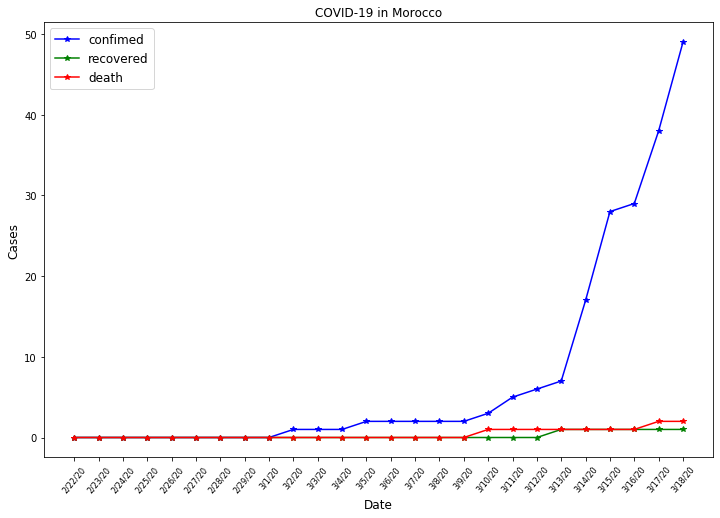

In [7]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[35:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:], '*-',color='blue')
plt.plot(list(df_recovered)[35:],df_recovered[df_recovered['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:], '*-',color='green')
plt.plot(list(df_deaths)[35:],df_deaths[df_deaths['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:], '*-', color='red')
plt.legend(['confimed','recovered','death'],fontsize=12)
plt.title('COVID-19 in Morocco')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

# 7-day forecast of COVID-19 infections in Morocco

At this time, data is still scarce and not suitable for accurate modeling, these results are then highly uncertain for now.

### Fit an exponential curve (worst case, not realistic)

population is finite thus an exponential model is not realistic but gives insights about the beggining of an infection

In [8]:
nbdays = 27  #nbdays of available data from 2/22/20

U,V = curve_fit(lambda t,a,b,c: a*np.exp(b*t)+c,
          np.arange(1,nbdays),
          df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:])

In [9]:
U, V

(array([ 0.02723665,  0.28986154, -0.30186299]),
 array([[ 1.75046637e-04, -2.52591209e-04, -4.73277768e-03],
        [-2.52591209e-04,  3.65925178e-04,  6.57094749e-03],
        [-4.73277768e-03,  6.57094749e-03,  3.29338419e-01]]))

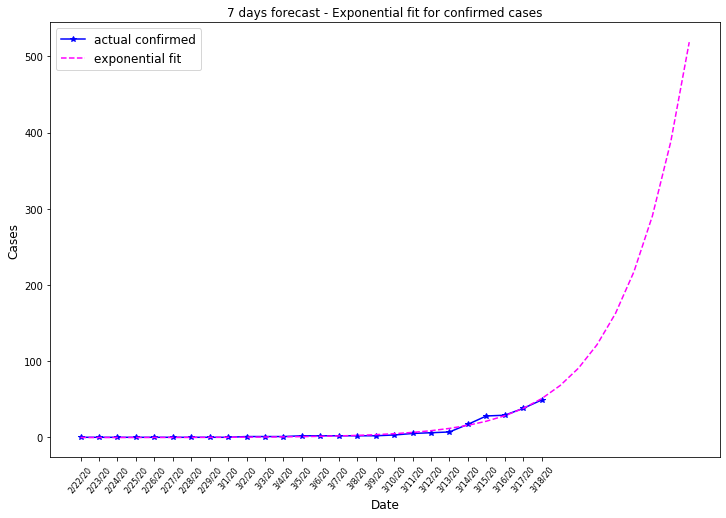

In [10]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[35:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:], '*-',color='blue')
plt.plot(np.arange(0,nbdays+7),U[0]*np.exp(U[1]*np.arange(1,nbdays+8))+U[2], '--',color='magenta')
plt.legend(['actual confirmed','exponential fit'],fontsize=12)
plt.title('7 days forecast - Exponential fit for confirmed cases')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

### Fit a logisitic curve (more realistic)

This model is widely used for estimating the growth of a population and also to simply model infections

In [11]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(a*x+b)))

In [21]:
nbdays = 27  #nbdays of available data from 2/22/20

U,V = curve_fit(logistic_model,
          np.arange(1,nbdays),
          df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:],
          p0=[2,-50,1000])#p0=[2,10,2000000]

In [22]:
U,V

(array([  0.4779753 , -11.77131865,  72.9218669 ]),
 array([[ 3.13244916e-03, -5.83098220e-02, -6.23803157e-01],
        [-5.83098220e-02,  1.10554511e+00,  1.09070689e+01],
        [-6.23803157e-01,  1.09070689e+01,  1.51348000e+02]]))

#### !!!!!!!!!!!!!! data is not sufficient to find a good logistic fit... 

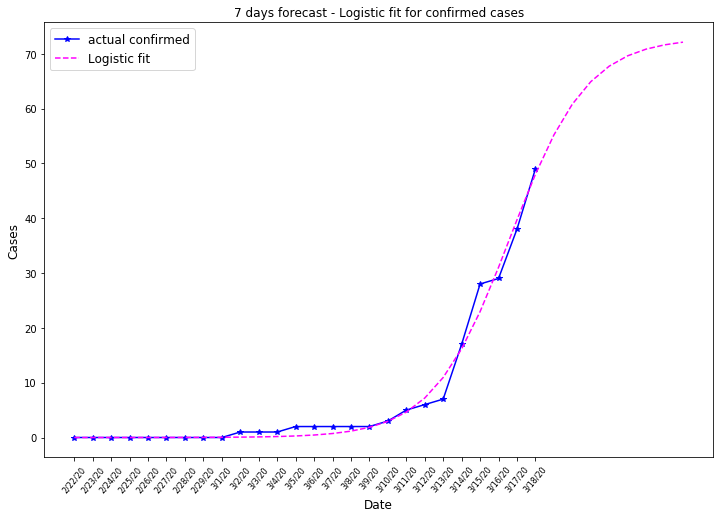

In [23]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[35:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:], '*-',color='blue')
plt.plot(np.arange(0,nbdays+7),U[2]/(1+np.exp(-(U[0]*np.arange(1,nbdays+8)+U[1]))), '--',color='magenta')
plt.legend(['actual confirmed','Logistic fit'],fontsize=12)
plt.title('7 days forecast - Logistic fit for confirmed cases')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

# Comparison with Malaysia

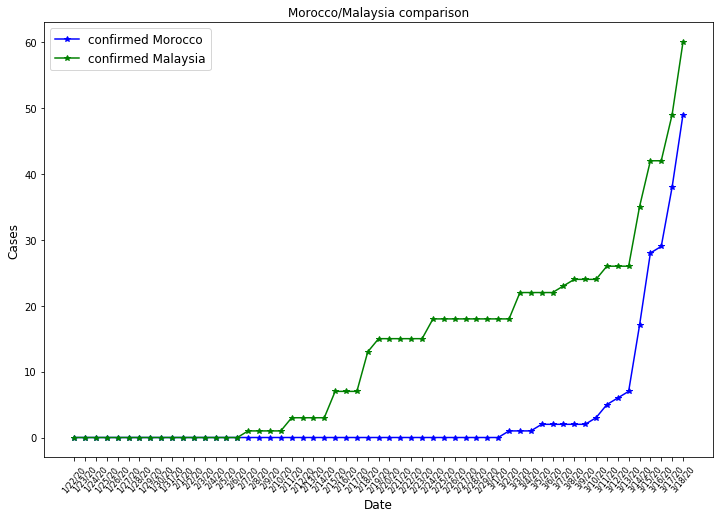

In [24]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[4:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '1/22/20':].values[0,:], '*-',color='blue')
plt.plot(list(df_confirmed)[4:],df_recovered[df_recovered['Country/Region']=='Malaysia'].loc[:, '1/22/20':].values[0,:], '*-',color='green')
plt.legend(['confirmed Morocco','confirmed Malaysia'],fontsize=12)
plt.title('Morocco/Malaysia comparison')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

#### shifting the Morocco curve

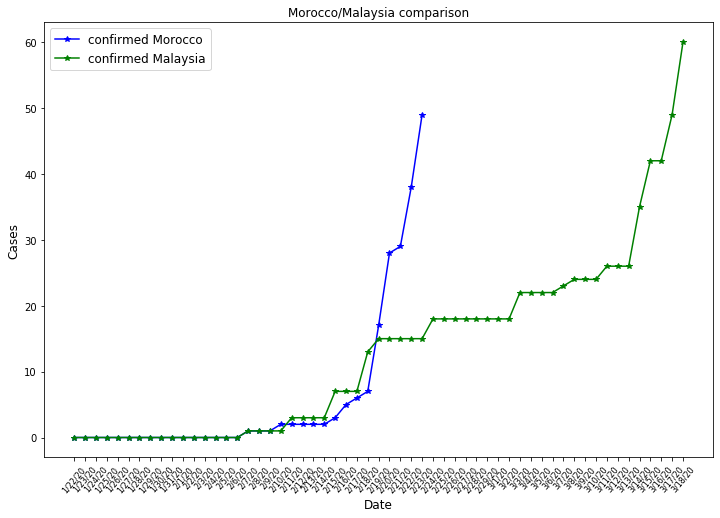

In [25]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '1/22/20':].values[0,24:], '*-',color='blue')
plt.plot(list(df_confirmed)[4:],df_recovered[df_recovered['Country/Region']=='Malaysia'].loc[:, '1/22/20':].values[0,:], '*-',color='green')
plt.legend(['confirmed Morocco','confirmed Malaysia'],fontsize=12)
plt.title('Morocco/Malaysia comparison')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()